# Bike Sharing EDA Exercise

### In this worksheet we will be exploring the bike dataset, the datset can be downloaded from https://www.kaggle.com/c/bike-sharing-demand/data. It is a regression problem where we have to predict the bike demand for a given hour of the day.

In [1]:
import pandas as pd
df_train=pd.read_csv('train_bikes.csv')
df_test=pd.read_csv('test_bikes.csv')
print("Shape of training data:{}".format(str((df_train.shape))))
print("Shape of test data:{}".format(str((df_test.shape))))

Shape of training data:(10886, 12)
Shape of test data:(6493, 9)


In [2]:
import datetime
df_train['Hour']=df_train['datetime'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time().hour )
df_train['Year']=df_train['datetime'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date().year )
df_train['Month']=df_train['datetime'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date().month )
df_train['Day']=df_train['datetime'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date().day )
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Year,Month,Day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,1


##  Performing feature engineering to add new columns

In [3]:
df_test['Hour']=df_test['datetime'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time().hour )
df_test['Year']=df_test['datetime'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date().year )
df_test['Month']=df_test['datetime'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date().month )
df_test['Day']=df_test['datetime'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date().day )
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Hour,Year,Month,Day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,2011,1,20
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,1,20
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,2011,1,20
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011,1,20
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,2011,1,20


# Perforimg outlier analysis

In [4]:
def plot_box_plot(data,feature):
    axes=sns.boxplot(data=data,y=feature)
    axes.set(ylabel=feature,title="Box Plot On {}".format(feature))
    plt.show()

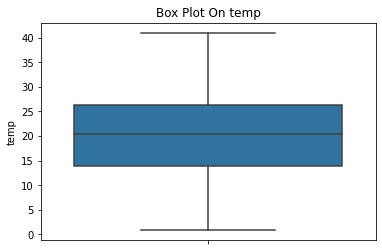

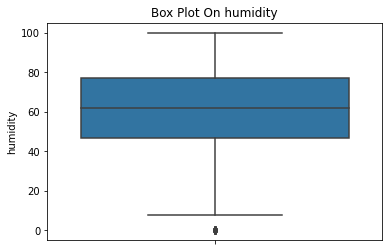

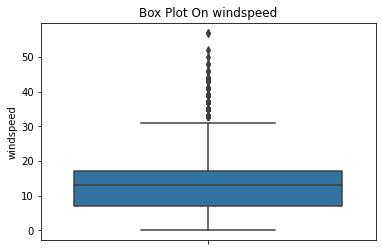

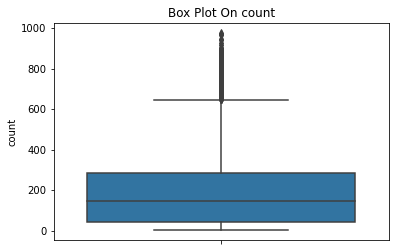

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns=['temp','humidity','windspeed','count']
for feature in numeric_columns:
    plot_box_plot(df_train,feature)
    

## Replacing the outlier values with upper boundary

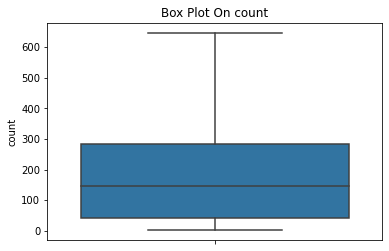

In [8]:
IQR=df_train['count'].quantile(0.75)-df_train['count'].quantile(0.25)
upper_boundary=df_train['count'].quantile(0.75) + 1.5*IQR
lower_boundary=df_train['count'].quantile(0.25) - 1.5*IQR
df_train.loc[df_train['count']>=upper_boundary,'count']=upper_boundary
df_train.loc[df_train['count']<=lower_boundary,'count']=lower_boundary
plot_box_plot(df_train,'count')

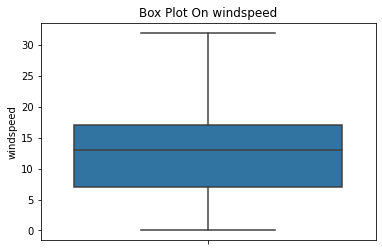

In [9]:
IQR_ws=df_train['windspeed'].quantile(0.75)-df_train['windspeed'].quantile(0.25)
upper_boundary_windspeed=df_train['windspeed'].quantile(0.75) + 1.5*IQR_ws
lower_boundary_windspeed=df_train['windspeed'].quantile(0.25) - 1.5*IQR_ws
df_train.loc[df_train['windspeed']>=upper_boundary_windspeed,'windspeed']=upper_boundary_windspeed
df_train.loc[df_train['windspeed']<=lower_boundary_windspeed,'windspeed']=lower_boundary_windspeed
plot_box_plot(df_train,'windspeed')


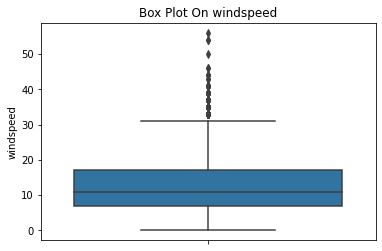

In [10]:
plot_box_plot(df_test,'windspeed')

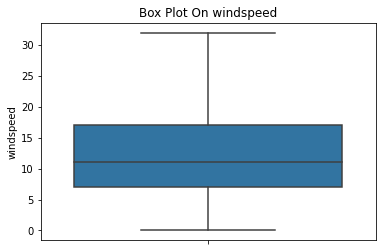

In [11]:
df_test.loc[df_test['windspeed']>=upper_boundary_windspeed,'windspeed']=upper_boundary_windspeed
df_test.loc[df_test['windspeed']<=lower_boundary_windspeed,'windspeed']=lower_boundary_windspeed
plot_box_plot(df_test,'windspeed')

## How to handle missing values
- First we have to check whether the data is missing completely at random or not
- If it is missing at random, then we can impute it using mean, mode or median
- If it is not missing at random, then we can use methods such as capturing the nan values with a variable,or we can impute it using KNN imputer

In [190]:
df_train.isnull().sum(axis=0)

datetime            0
season              0
holiday             0
workingday          0
weather             0
temp                0
atemp               0
humidity            0
windspeed           0
casual              0
registered          0
count               0
Hour                0
Year                0
Month               0
Day                 0
count_Boxcox        0
windspeed_Boxcox    0
dtype: int64

## Now we will explore how the categorical variables change with the dependent variables

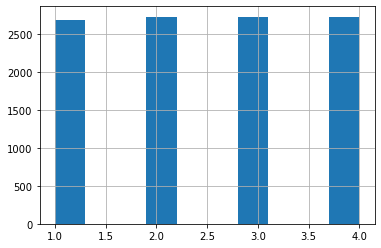

In [191]:
df_train['season'].hist()

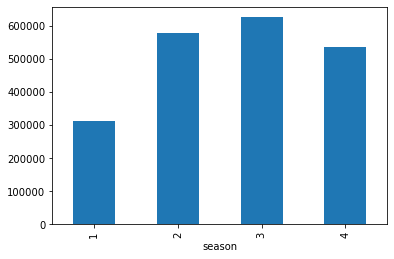

In [192]:
df_train.groupby(['season'])['count'].sum().plot.bar()

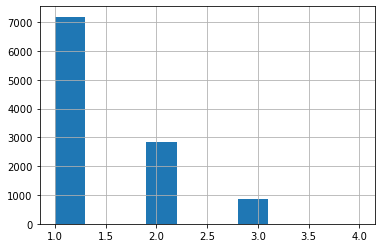

In [193]:
df_train['weather'].hist()

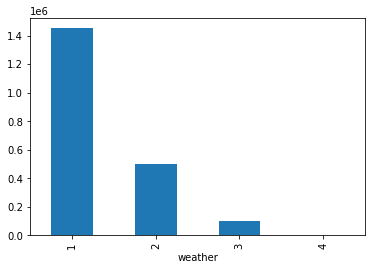

In [194]:
df_train.groupby(['weather'])['count'].sum().plot.bar()

### From this I can see that with change in weather there is change in bookings made which means that there is some relationship between weather and count

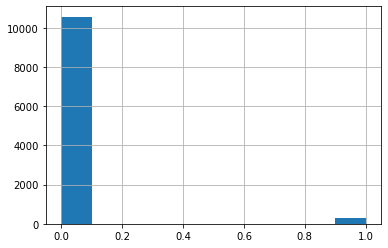

In [195]:
df_train['holiday'].hist()

In [196]:
df_train.groupby(['holiday'])['count'].sum()

holiday
0    1996527.0
1      57714.0
Name: count, dtype: float64

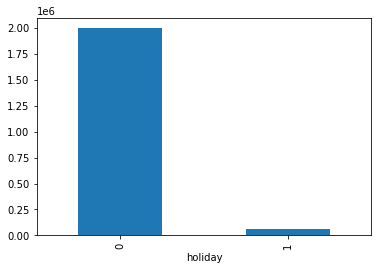

In [197]:
df_train.groupby(['holiday'])['count'].sum().plot.bar()

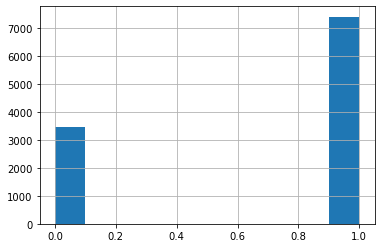

In [198]:
df_train['workingday'].hist()

In [199]:
df_train.groupby(['workingday'])['count'].sum()

workingday
0     652908.0
1    1401333.0
Name: count, dtype: float64

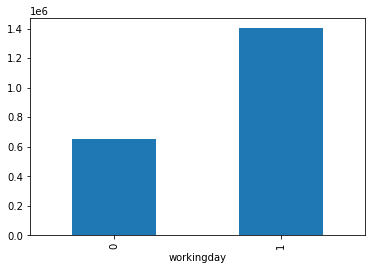

In [200]:
df_train.groupby(['workingday'])['count'].sum().plot.bar()

# Now we will look how the count variable varies with the temporal variables

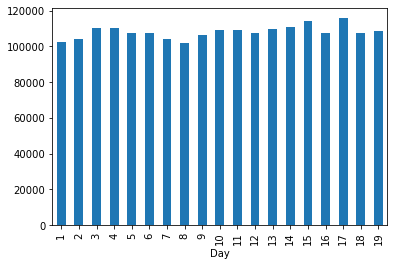

In [206]:
df_train.groupby(['Day'])['count'].sum().plot.bar()

## From the above figure we can see that change in day has no affecton the bookings made

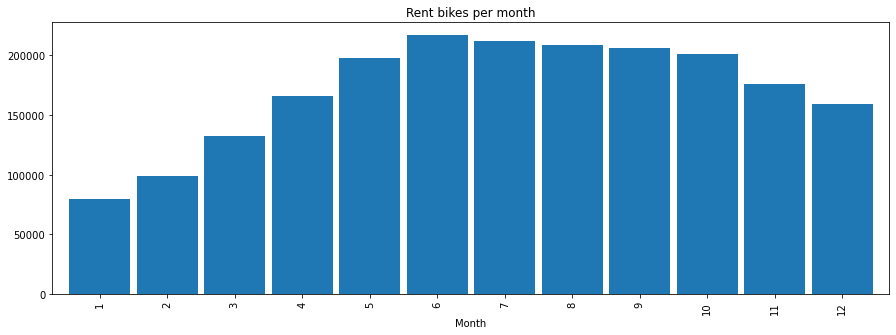

In [207]:
title="Rent bikes per month"
df_train.groupby(['Month'])['count'].sum().plot(kind='bar', figsize=(15,5), width=0.9, title=title)

## The cold months experience a dip in the bookings

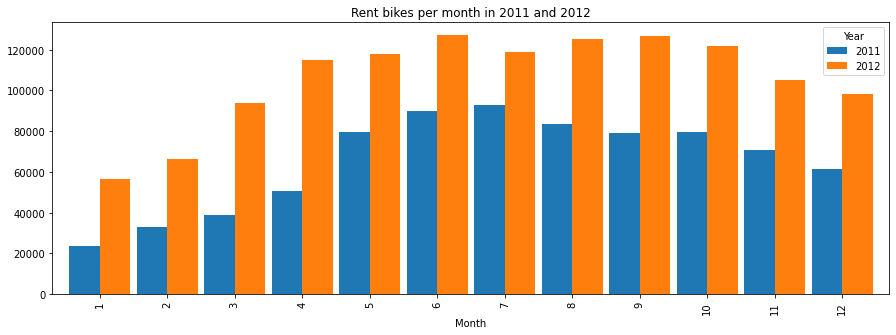

In [208]:
title="Rent bikes per month in 2011 and 2012"
df_train.groupby(['Month','Year'])['count'].sum().unstack().plot(kind='bar', figsize=(15,5), width=0.9, title=title)

## There has been an increase in demand in year 2012 as compared to 2011 which highlights more adoption in the users

In [209]:
# method to plot a graph for count per hour
def plot_hours(data, message = ''):
    
    
    hours = {}
    for hour in range(24):
        hours[hour] = data[ data.Hour == hour ]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])
 

c:\users\aksha\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\aksha\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


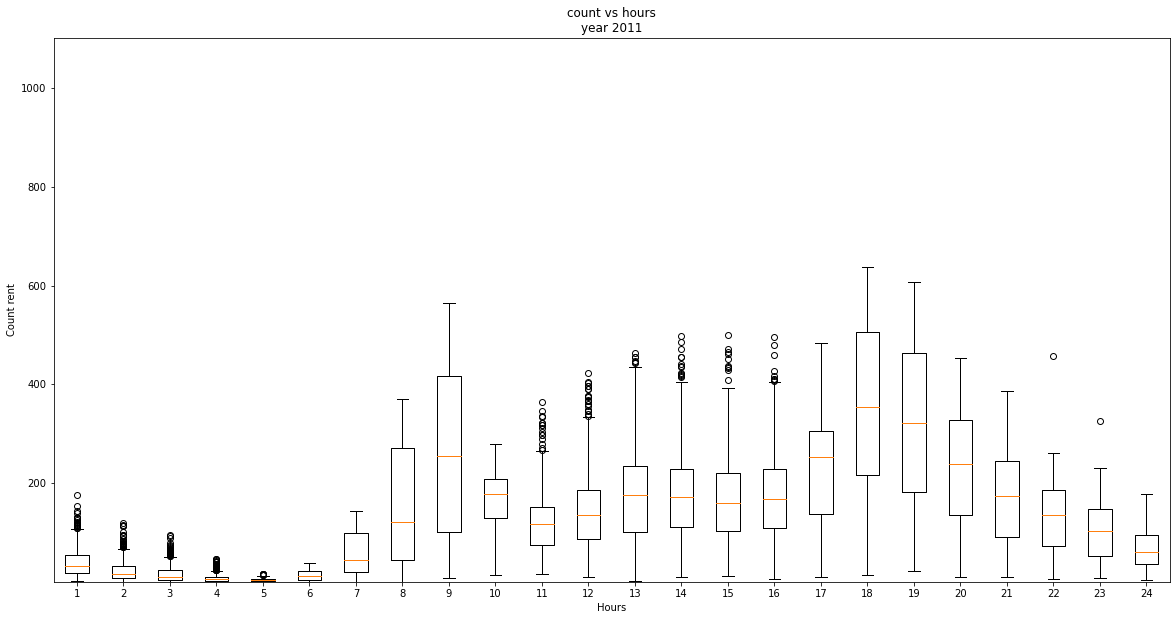

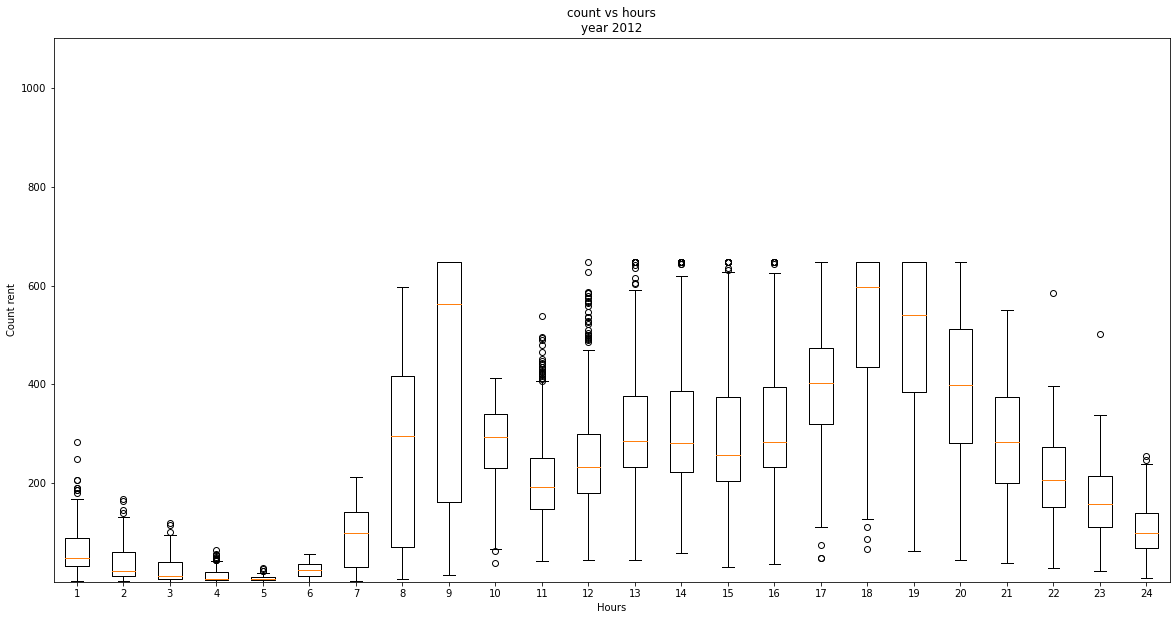

In [210]:
plot_hours( df_train[df_train.Year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( df_train[df_train.Year == 2012], 'year 2012') # box plot for hourly count for the mentioned year

## Now we will check whether the continous variables are normally distributed or not

- If they are normally distributed then applying Standardisation over Normalisation is preffered
- If they are not normally distributed we will apply several transformations to convert them to be normally distributed
- Once we have achieved the normal distribution by checking it through Q-Q plot, we will then check the scales of the transformed distribution. If required we will then apply standardisation/normalisation on that column

In [204]:
import scipy.stats as stat
import pylab

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

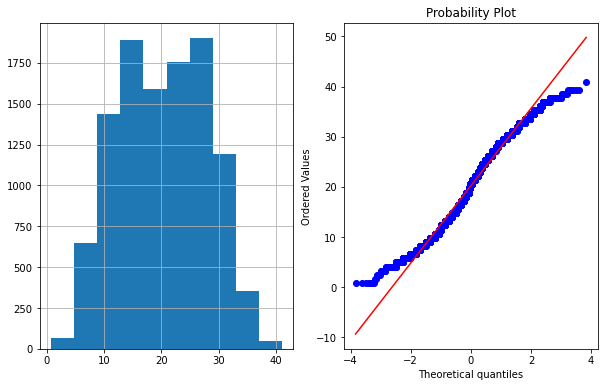

In [201]:
plot_data(df_train,'temp')

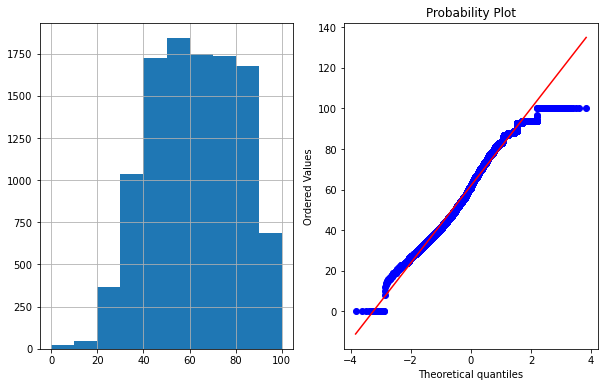

In [202]:
plot_data(df_train,'humidity')

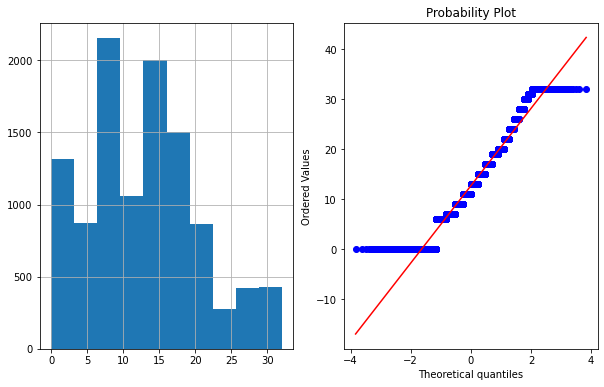

In [203]:
plot_data(df_train,'windspeed')

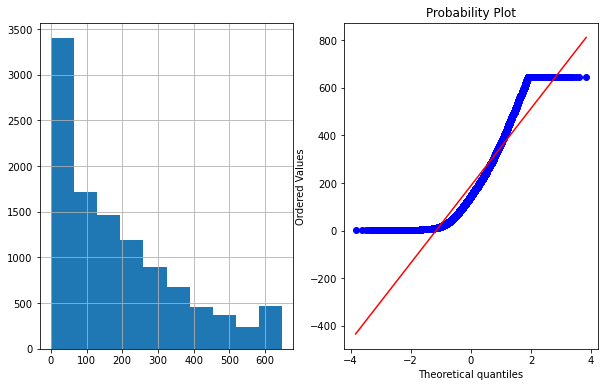

In [205]:
plot_data(df_train,'count')

## From the above plots, I can see that the windspeed and count i.e the target variable is not normally distributed

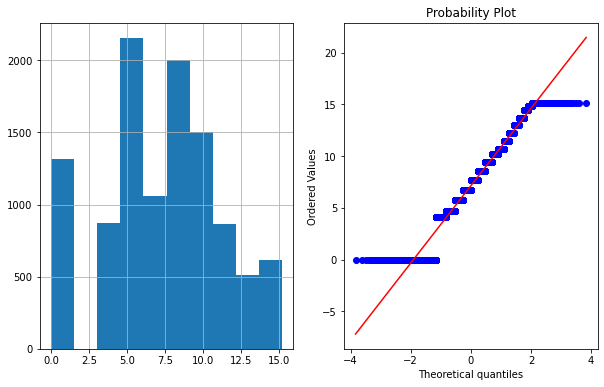

In [16]:
df_train['windspeed_Boxcox'],parameters=stat.boxcox(df_train['windspeed']+1)

plot_data(df_train,'windspeed_Boxcox')

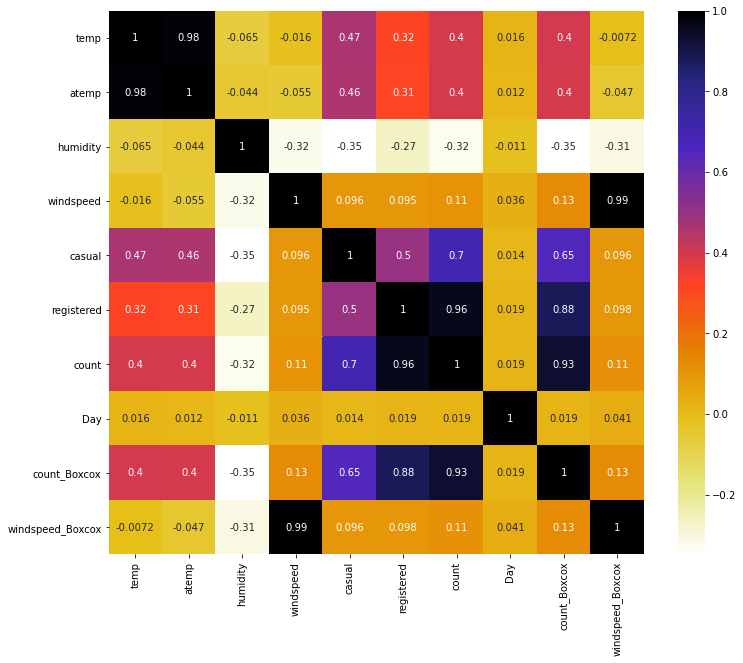

In [211]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
corr=df_train.corr()
sns.heatmap(corr,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# From the heatmap I can conclude:
- Day is independent of the target column
- atemp is highly co-related with temp, hence we can drop it 
- casual and registered users represents the sum of the bookings thus we will drop them before training otherwise it will lead to data leakage

## Now we will approach the encoding of categorical variables

In [18]:
cat_cols=['season', 'holiday', 'workingday', 'weather','Year','Month','Hour']
num_cols=['temp','humidity','windspeed_Boxcox']
for feature in cat_cols:
    df_train[feature]=df_train[feature].astype('category')
df_train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   Year        10886 non-null  category
 5   Month       10886 non-null  category
 6   Hour        10886 non-null  category
dtypes: category(7)
memory usage: 76.4 KB


In [20]:
data=df_train[cat_cols].copy()

## I implemented Binary Encoding Here
- I have to try frequency encoding and see how the performance of the model changes
- I have to try target guided mean encoding
- I have to try one hot encoding


In [21]:
import category_encoders as ce
import pandas as pd
encoder= ce.BinaryEncoder(cols=cat_cols,return_df=True)
encoder.fit(data)
data_encoded=encoder.transform(data) 
data_encoded

,season_0,season_1,season_2,holiday_0,holiday_1,workingday_0,workingday_1,weather_0,weather_1,weather_2,...,Month_1,Month_2,Month_3,Month_4,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
3,0,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1,0,0,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0
10882,1,0,0,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,1,0,1
10883,1,0,0,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,1,1,0
10884,1,0,0,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,1,1,1


In [23]:
data_test=df_test[cat_cols].copy()

In [24]:
data_encoded_test=encoder.transform(data_test) 
data_encoded_test

,season_0,season_1,season_2,holiday_0,holiday_1,workingday_0,workingday_1,weather_0,weather_1,weather_2,...,Month_1,Month_2,Month_3,Month_4,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
3,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,0,1,0,1,1,0,0,1,0,...,1,1,0,0,0,1,0,1,0,0
6489,0,0,1,0,1,1,0,0,1,0,...,1,1,0,0,0,1,0,1,0,1
6490,0,0,1,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,1,1,0
6491,0,0,1,0,1,1,0,0,0,1,...,1,1,0,0,0,1,0,1,1,1


In [25]:
num_cols

['temp', 'humidity', 'windspeed_Boxcox']

In [26]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df_train[num_cols])
### fit vs fit_transform
df_scaled=scaler.transform(df_train[num_cols])
df_scaled=pd.DataFrame(df_scaled,columns=num_cols)
df_scaled.head()

,temp,humidity,windspeed_Boxcox
0,-1.333661,0.993213,-1.874504
1,-1.438907,0.941249,-1.874504
2,-1.438907,0.941249,-1.874504
3,-1.333661,0.681430,-1.874504
4,-1.333661,0.681430,-1.874504


In [27]:
df_scaled.shape

(10886, 3)

In [28]:
df_scaled_test=scaler.transform(df_test[num_cols])
df_scaled_test=pd.DataFrame(df_scaled_test,columns=num_cols)
df_scaled_test.head()

,temp,humidity,windspeed_Boxcox
0,-1.228414,-0.305883,1.464861
1,-1.228414,-0.305883,-1.874504
2,-1.228414,-0.305883,-1.874504
3,-1.228414,-0.305883,-0.133850
4,-1.228414,-0.305883,-0.133850


In [29]:
df_scaled_test.shape

(6493, 3)

In [30]:
df_train_preprocessed=pd.concat([data_encoded,df_scaled],axis=1)
df_train_preprocessed.shape

(10886, 26)

In [31]:
df_test_preprocessed=pd.concat([data_encoded_test,df_scaled_test],axis=1)
df_test_preprocessed.shape

(6493, 26)

In [32]:
df_train_preprocessed.columns

Index(['season_0', 'season_1', 'season_2', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_0', 'weather_1', 'weather_2',
       'Year_0', 'Year_1', 'Month_0', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'temp', 'humidity', 'windspeed_Boxcox'],
      dtype='object')

In [34]:
df_train['count']

0         16.0
1         40.0
2         32.0
3         13.0
4          1.0
         ...  
10881    336.0
10882    241.0
10883    168.0
10884    129.0
10885     88.0
Name: count, Length: 10886, dtype: float64

In [ ]:
X_train=df_train_preprocessed

In [33]:
import numpy as np
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## The sklearn LinearRegression is not perofrming gradient descent but rather performs SVD to obtain the weight parameters

In [36]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(df_train['count'])
lModel.fit(X = df_train_preprocessed,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X=df_train_preprocessed)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Linear Regression:  0.855281220295828


## This uses Stochastic Gradient Descent for optimisation

In [152]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_b, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [154]:
np.exp(sgd_reg.predict(X_b))

array([ 10.64397769,  10.67165564,  13.64613994, ..., 236.42453704,
       295.09101103, 796.42589954])

In [155]:
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(sgd_reg.predict(X_b)),False))

RMSLE Value For Linear Regression:  0.8729313820496043


## Now we will try to implement a Polynomial Regression Model
- A polynomial regression model expands the feature space by transforming the original data to a higher dimension specified by the degree provided at the time of training
- This model is still refered to a linear model because it is linear wrt to the weights

In [157]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_b)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# print(lin_reg.intercept_, lin_reg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(lin_reg.predict(X_poly)),False))

RMSLE Value For Linear Regression:  0.6172550505175706


## Implementing Ridge Regression
- Ridge regression is used to regularise the linear regression model by adding a penalty to the weights
- The l2 norm of the weight vector is calculated, where the l2 norm represents the euclidean distance
- The alpha hyperparameter controls the amount of regularisation, if alhpa is zero then it acts as a linear regression model and if alpha is very high then it behaves as a straight line passing through the mean


In [169]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=300, solver="cholesky")
ridge_reg.fit(X_b, y)

print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(ridge_reg.predict(X_b)),False))

RMSLE Value For Linear Regression:  0.8658408741887176


In [170]:

submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(ridge_reg.predict(df_test_preprocessed))]
    })
submission.to_csv('bike_predictions_ridge.csv', index=False)

## Implementing the Ridge Regression using the Stochastic Gradient class

In [175]:
sgd_reg = SGDRegressor(penalty="l2",alpha=0.001)
sgd_reg.fit(X_b, y.ravel())
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(sgd_reg.predict(X_b)),False))

RMSLE Value For Linear Regression:  0.8575788094180451


## Perform hyperparameter tuning for Ridge Regression



{'alpha': 30, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.85499062156955


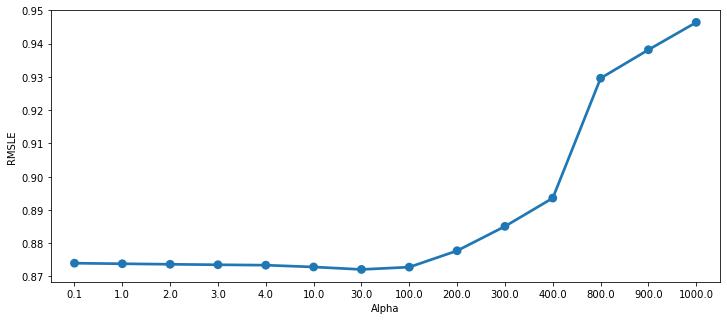

In [187]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( X_b, yLabelsLog )
preds = grid_ridge_m.predict(X= X_b)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
cvres = grid_ridge_m.cv_results_
mean_scores=[]
alpha=[]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    
    mean_scores.append(-mean_score)
    alpha.append(params['alpha'])

df=pd.DataFrame({'Alpha':alpha,'RMSLE':mean_scores})
sns.pointplot(data=df,x="Alpha",y="RMSLE",ax=ax)

## Implementing the Lasso class
- Lasso Regression using l1 norm as a regularisation technique
- It also performs feature selection and eliminates the variables that are not important

In [176]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_b, y)
lasso_reg.predict(X_b)

array([3.24879337, 3.22329447, 3.22329447, ..., 4.56467607, 4.56467607,
       5.25237102])

{'alpha': 0.0025, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.8557030363556922


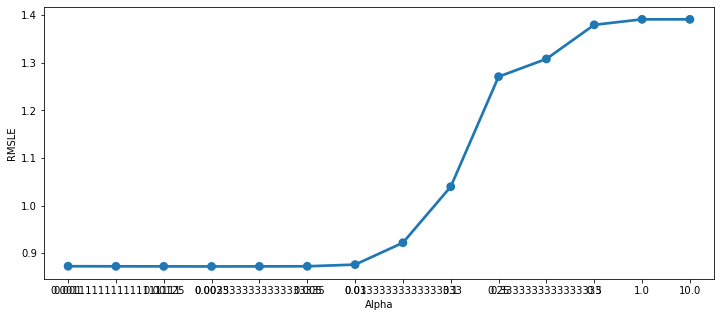

In [189]:
# Implementing hyperparameter tuning for Lasso
alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_={'max_iter':[3000],'alpha':alpha}
grid_lasso_m = GridSearchCV(Lasso(),lasso_params_,scoring = rmsle_scorer,cv=5)
grid_lasso_m.fit(X_b,y)
print(grid_lasso_m.best_params_)
preds=grid_lasso_m.predict(X_b)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
cvres = grid_lasso_m.cv_results_
mean_scores=[]
alpha=[]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    
    mean_scores.append(-mean_score)
    alpha.append(params['alpha'])

df=pd.DataFrame({'Alpha':alpha,'RMSLE':mean_scores})
sns.pointplot(data=df,x="Alpha",y="RMSLE",ax=ax)

In [61]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(df_train_preprocessed,yLabelsLog)
mutual_info

array([0.00614727, 0.02676006, 0.00802394, 0.        , 0.01155797,
       0.00414535, 0.00816367, 0.        , 0.00659217, 0.        ,
       0.05197465, 0.04714693, 0.00150136, 0.01450195, 0.01077627,
       0.00297315, 0.00049713, 0.01110797, 0.09513454, 0.07440548,
       0.03388499, 0.00888938, 0.        , 0.14375729, 0.09231859,
       0.01839329])

In [62]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_train_preprocessed.columns
mutual_info.sort_values(ascending=False)

temp                0.143757
Hour_1              0.095135
humidity            0.092319
Hour_2              0.074405
Year_0              0.051975
Year_1              0.047147
Hour_3              0.033885
season_1            0.026760
windspeed_Boxcox    0.018393
Month_1             0.014502
holiday_1           0.011558
Hour_0              0.011108
Month_2             0.010776
Hour_4              0.008889
workingday_1        0.008164
season_2            0.008024
weather_1           0.006592
season_0            0.006147
workingday_0        0.004145
Month_3             0.002973
Month_0             0.001501
Month_4             0.000497
weather_0           0.000000
weather_2           0.000000
holiday_0           0.000000
Hour_5              0.000000
dtype: float64

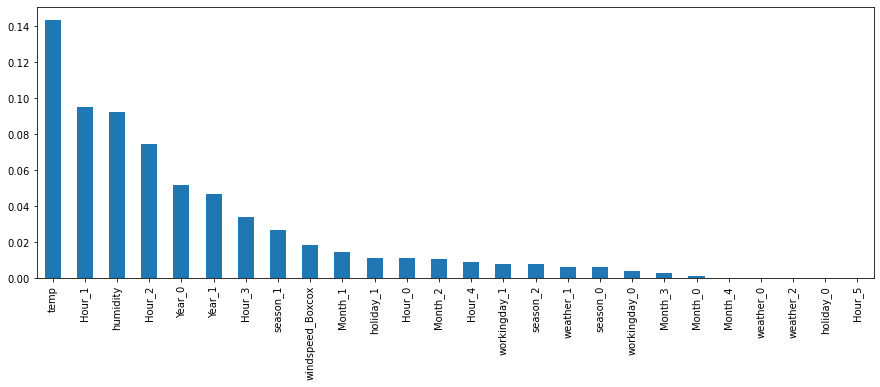

In [64]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [65]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(df_train_preprocessed,yLabelsLog)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000027EBBBBE790>)

In [69]:
important_columns=list(df_train_preprocessed.columns[selected_top_columns.get_support()])
important_columns

['Year_0', 'Hour_1', 'Hour_2', 'temp', 'humidity']

## Now  I will train the model using only these selected features

In [70]:
# Initialize logistic regression model
lModel1 = LinearRegression()

# Train the model
yLabelsLog = np.log1p(df_train['count'])
lModel1.fit(X = df_train_preprocessed[important_columns],y = yLabelsLog)

# Make predictions
preds1 = lModel1.predict(X=df_train_preprocessed[important_columns])
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds1),False))

RMSLE Value For Linear Regression:  0.9063207790580466


## My RMSLE increased due to the drop in columns, but do we observe the increase in accuracy score with this change?

In [72]:
preds = lModel1.predict(X= df_test_preprocessed[important_columns])

In [73]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(preds)]
    })
submission.to_csv('bike_predictions_impfeatures.csv', index=False)

In [40]:
datetimecol=list(df_test['datetime'].values)
datetimecol

['2011-01-20 00:00:00',
 '2011-01-20 01:00:00',
 '2011-01-20 02:00:00',
 '2011-01-20 03:00:00',
 '2011-01-20 04:00:00',
 '2011-01-20 05:00:00',
 '2011-01-20 06:00:00',
 '2011-01-20 07:00:00',
 '2011-01-20 08:00:00',
 '2011-01-20 09:00:00',
 '2011-01-20 10:00:00',
 '2011-01-20 11:00:00',
 '2011-01-20 12:00:00',
 '2011-01-20 13:00:00',
 '2011-01-20 14:00:00',
 '2011-01-20 15:00:00',
 '2011-01-20 16:00:00',
 '2011-01-20 17:00:00',
 '2011-01-20 18:00:00',
 '2011-01-20 19:00:00',
 '2011-01-20 20:00:00',
 '2011-01-20 21:00:00',
 '2011-01-20 22:00:00',
 '2011-01-20 23:00:00',
 '2011-01-21 00:00:00',
 '2011-01-21 01:00:00',
 '2011-01-21 02:00:00',
 '2011-01-21 03:00:00',
 '2011-01-21 04:00:00',
 '2011-01-21 05:00:00',
 '2011-01-21 06:00:00',
 '2011-01-21 07:00:00',
 '2011-01-21 08:00:00',
 '2011-01-21 09:00:00',
 '2011-01-21 10:00:00',
 '2011-01-21 11:00:00',
 '2011-01-21 12:00:00',
 '2011-01-21 13:00:00',
 '2011-01-21 14:00:00',
 '2011-01-21 15:00:00',
 '2011-01-21 16:00:00',
 '2011-01-21 17:

## Perforing Regression using Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabels=df_train['count']
yLabelsLog = np.log1p(yLabels)
dataTrain=df_train_preprocessed
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Random Forest:  0.1218971401174372


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
yLabelsLog = np.log1p(yLabels)
gbm.fit(dataTrain,yLabelsLog)
preds = gbm.predict(X= dataTrain)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.37114883159618617


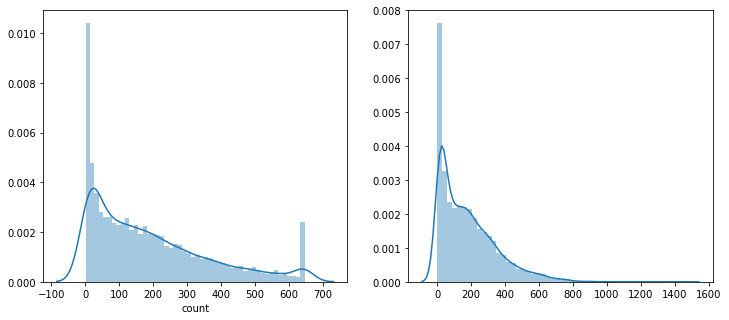

In [45]:
predsTest = gbm.predict(X= df_test_preprocessed)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(yLabels,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)

In [48]:
preds = rfModel.predict(X= df_test_preprocessed)

In [49]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(preds)]
    })
submission.to_csv('bike_predictions_rf.csv', index=False)